In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc

def get_results_file(experiment, dataset):
    
    root_path = "/home/colombelli/Documents/Experiments08_jul/" + dataset + "/"
    results_file_name = "/final_results.csv"
    complete_path = root_path + experiment + results_file_name
    return pd.read_csv(complete_path)

In [35]:
hyb = get_results_file("Hyb_borda_borda", 'BRCA')
het = get_results_file("Het_borda", 'BRCA')
hom = get_results_file("Hom_relieff", 'BRCA')
hom_wx = get_results_file("Hom_Wx", 'BRCA')

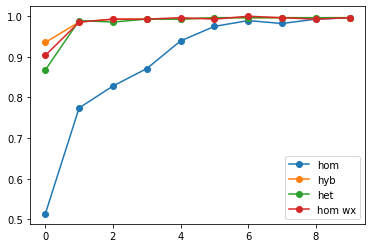

In [38]:
plt.plot(hom['mean_ACC'], 'o-', label="hom")
plt.plot(hyb['mean_ACC'], 'o-', label="hyb")
plt.plot(het['mean_ACC'], 'o-', label="het")
plt.plot(hom_wx['mean_ACC'], 'o-', label="hom wx")
plt.legend()

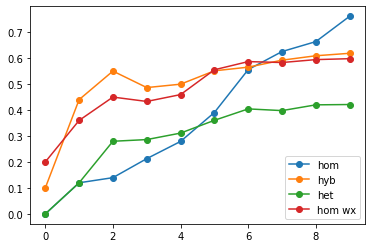

In [39]:
plt.plot(hom['stabilities'], 'o-', label="hom")
plt.plot(hyb['stabilities'], 'o-', label="hyb")
plt.plot(het['stabilities'], 'o-', label="het")
plt.plot(hom_wx['stabilities'], 'o-', label="hom wx")
plt.legend()

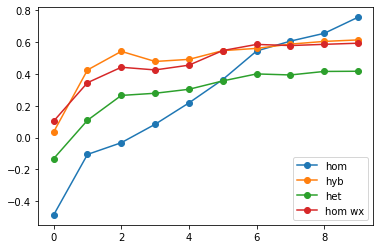

In [40]:
plt.plot(hom['stabilities']+hom['mean_ACC']-1, '-o', label="hom")
plt.plot(hyb['stabilities']+hyb['mean_ACC']-1, '-o', label="hyb")
plt.plot(het['stabilities']+het['mean_ACC']-1, '-o', label="het")
plt.plot(hom_wx['stabilities']+hom_wx['mean_ACC']-1, '-o', label="hom wx")
plt.legend()

In [41]:
ths = hom['th_int'].values

In [22]:
import math

th_transf = []

for th in ths:
    
    th_transf.append(
       1 - (math.log(th, 2) / math.log(14000, 2))
    )

th_transf

[1.0,
 0.8314162036673142,
 0.7588111145158072,
 0.7163398600006592,
 0.6628324073346283,
 0.5902273181831215,
 0.5477560636679734,
 0.5176222290316144,
 0.4751509745164664,
 0.4450171398801074]

In [42]:
def get_colombelli_score(experiment, dataset, alpha, sigma):
    
    results = get_results_file(experiment, dataset)
    norm_stb = (results['stabilities']+1)/2 
    x = th_transf
    y = list((alpha * results['mean_ROC_AUC']) + (sigma * norm_stb) - (alpha + sigma - 1))
    
    cs = auc(x,y)
    return cs

In [43]:
experiments = ["Hyb_borda_borda", "Het_borda", "Hom_relieff", "Hom_Wx"]
performance_dict = {}
for exp in experiments:
    performance_dict[exp] = get_colombelli_score(exp, "BRCA", 1, 1)*100
    
sorted(performance_dict.items(), key=lambda x: x[1], reverse=True)

[('Hyb_borda_borda', 40.076185853564056),
 ('Hom_Wx', 38.76792781175013),
 ('Het_borda', 33.25846588838223),
 ('Hom_relieff', 27.9532474904351)]